# 一、聚类分析

以iris数据集为例来介绍K均值算法，我们已经知道了iris数据集中有三种类型的鸢尾花，现在我们不是做分类模型，而是通过X变量对所有的花进行聚类，然后再和真实的类结果做一个对比，看看聚类的结果是否靠谱

In [4]:
# 导入相关包
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Step1：数据准备 
# 读取iris数据
iris = datasets.load_iris()
X = iris.data
X_names = iris.feature_names
y = iris.target
print(X_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


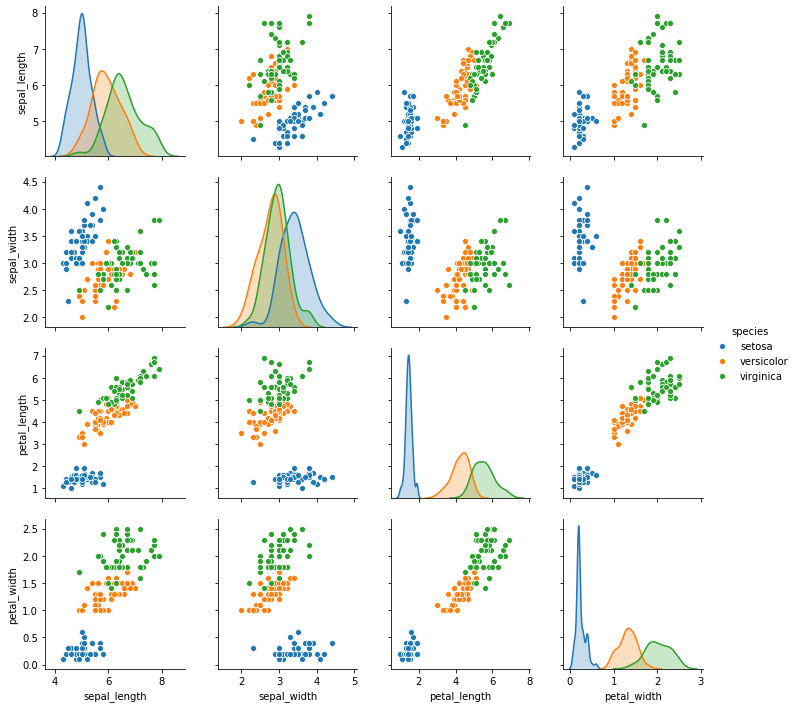

In [6]:
# 对iris数据集中的X变量进行两两作图，查看数据点的分布情况
# 使用seaborn的pairplot图
iris = sns.load_dataset("iris") # 使用了seaborn自带的iris数据集，sklearn的iris把X和y拆分开了，不适合直接使用
sns.pairplot(iris, hue="species")


In [7]:
# Step2：模型训练 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# 查看模型结果
print(kmeans.cluster_centers_) #k个类中心点
print(kmeans.labels_)  #每一个样本所属的聚类编号


[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [9]:
# Step3：模型预测 
# 使用predict方法对指定的数据集X进行预测
cluster_label = kmeans.predict(X) 
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [11]:
# 我们看到针对训练数据集X的预测结果与模型中的labels_结果是一致的。
# 把labels_合并到数据集X中去
labels = kmeans.labels_.reshape(len(kmeans.labels_),1)
cluster_result = pd.DataFrame(np.concatenate((X,labels),axis=1),columns=X_names+['cluster'])
cluster_result.head(20)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


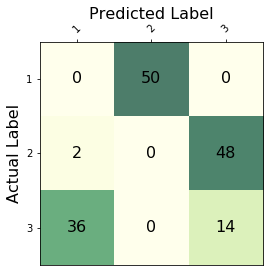

In [8]:
# 聚类结果与真实的分类结果对比 
# 由于我们知道数据集中存在三种类型的鸢尾花，我们可以把聚类的结果
# 与真实的结果做一个对比看看，我们使用误分类矩阵的分析方法。
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 定义了一个更美观误分类矩阵的函数
def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)
# 误分类矩阵
class_labels = [1,2,3]
cnf_matrix = confusion_matrix(y,cluster_label) #cluster_label是聚类结果，y是真实的类标签
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()


结论说明：
* 编号为2的聚类中，100%的都是target=2的鸢尾花，说明target=2的鸢尾花很好的被聚出来了
* 编号为3的聚类中，38个样本中36个属于target=3的鸢尾花，也说明这个类中的大部分鸢尾花都是比较相似的
* 编号为1的聚类中，62个样本有48个属于target=2，14个属于target=3，从这个结果来看，也说明target=2和3这两种鸢尾花它们之间可能是比较相似的，所以聚类算法不一定能非常好的把它们区隔出来。


## 1.1 K均值算法调参

In [12]:
# sklearn中没有现成的计算畸变程度的函数，我们可以自行使用scipy来计算畸变程度，也很简单。
# Step1：数据准备 
# 我们使用和上一节一样的iris数据来构建聚类模型
# 导入相关包
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#读取iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

Text(0.5, 1.0, 'find the best k value')

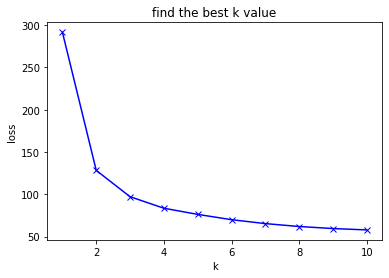

In [14]:
# Step2：肘部法则调参 
# 我们使用scipy.spatial.distance.cdist函数来计算两个点之间的欧式距离，尝试K的取值从1-10，相当于针对10个不同的K值构建10个模型，然后分别评估他们的损失函数（畸变程度）。
# 计算K值从1-10对应的损失函数值（畸变程度）
from scipy.spatial.distance import cdist #导入计算欧式距离的库
K=range(1,11) #K的取值从1-10
distortions=[]
# 针对不同的k值循环建模并计算损失函数
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1)))
# 作图
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel("loss")
plt.title("find the best k value")


结论：从上图可以看出，当k值大于3以后，损失函数的下降趋势就很缓慢了，所以可以考虑最佳的k值就是3。

# 二、DBSCAN  算法

In [15]:
# Step1：数据准备 
# 为了更明显的体现DBSCAN与K均值的差异，我们构造一个非凸的数据集，它适合用DBSCAN来聚类而不是适合K均值。
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

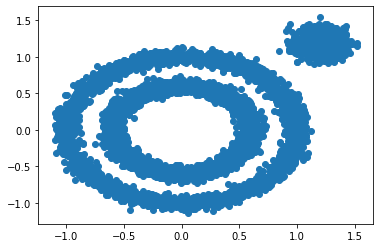

In [16]:
# 构造数据集X，并可视化查看数据结构
X1, y1=datasets.make_circles(n_samples=5000, factor=.6, noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]], random_state=9)
X = np.concatenate((X1, X2))
# 用X1和X2两个变量作散点图
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

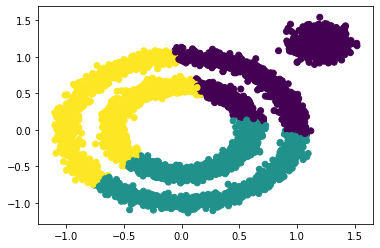

In [17]:
# Step2：模型训练 
#我们对比K均值和DBSCAN两个模型
# 1、 K均值聚类
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3).fit_predict(X) # 聚类结果保存为cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster) # 用cluster作为颜色图例显示聚类结果
plt.show()


> 从上面的结果可以看到：K均值对于非凸数据集的聚类效果不太好，这就是我们之前说K均值只适合凸数据集。

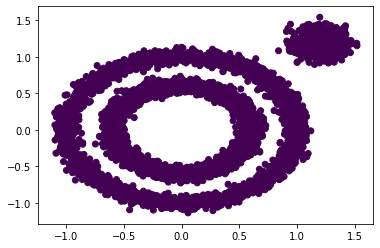

In [18]:
# DBSCAN聚类模型
# 一开始我们使用默认参数先看看DBSCAN模型的效果
from sklearn.cluster import DBSCAN
cluster = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()

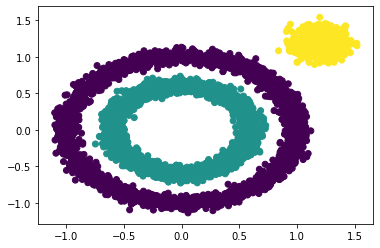

In [19]:
# eps默认是0.5,我们减到0.1看看效果。
cluster = DBSCAN(eps = 0.1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()

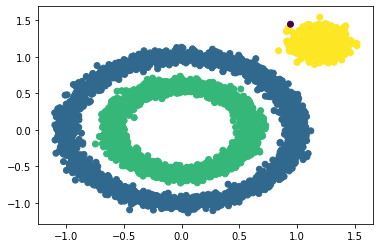

In [20]:
#我们现在将min_samples从默认的5增加到10。看看效果
cluster = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()


> 现在这个聚类结果就符合我们的预期了！通过这个例子我们可以看到DBSCAN的调参非常重要。此外，我们也看到：数据的可视化可以帮助我们更好的发现数据的结构，这样方便我们判断使用什么样的聚类算法。 

# 三、聚类模型的评估指标

In [21]:
# 数据准备 
# 我们使用和“K均值算法调参”一节同样的数据集iris
# 导入相关包
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
#读取iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [22]:
# 基于“畸变程度”的肘部法则调参 
# 我们使用scipy.spatial.distance.cdist函数来计算两个点之间的欧式距离，尝试K的取值从1-10，
# 相当于针对10个不同的K值构建10个模型，然后分别评估他们的损失函数（畸变程度）。
# 计算K值从1-10对应的损失函数值（畸变程度）

from scipy.spatial.distance import cdist 
#导入计算欧式距离的库
K=range(1,11) #K的取值从1-10
distortions=[]
# 针对不同的k值循环建模并计算损失函数
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1)))

Text(0.5, 1.0, 'find the best k value')

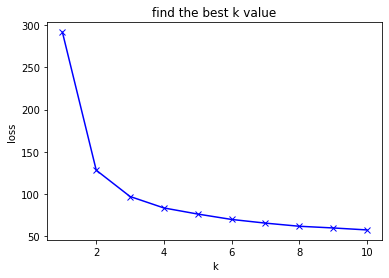

In [23]:
# 作图
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel("loss")
plt.title("find the best k value")


In [21]:
# 基于“轮廓系数”的肘部法则调参 
# 计算K值从2-10对应的轮廓系数ss（silhouette_score）
from sklearn.metrics import silhouette_score
K=range(2,11) #K的取值从2-10
ss = []
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    ss.append(silhouette_score(X,kmeans.labels_,metric='euclidean'))

Text(0.5, 1.0, 'find the maximum silhouette_score')

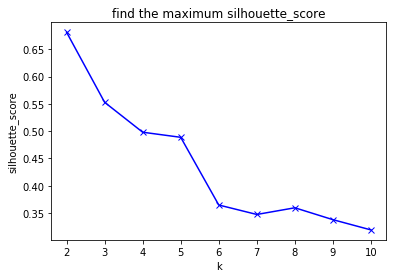

In [22]:
# 画图
plt.plot(K,ss,'bx-')
plt.xlabel('k')
plt.ylabel("silhouette_score")
plt.title("find the maximum silhouette_score")

> 从结果来看，当K=2的时候轮廓系数值最高，随着聚类数K的不断增大，轮廓系数值逐渐变小趋近于0，如前面介绍的，当轮廓系数接近0的时候，说明样本就在两个簇的边界区分不来，这也是符合逻辑的